## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [7]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [25]:
!head data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [23]:
!head data/happiness2020.csv

country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
Afghanistan,2.566900015,0.470366955,52.59000015,0.39657300700000003,-0.0964294,0.9336865540000001,South Asia
Albania,4.882699966000001,0.671070457,68.70813751,0.7819942240000001,-0.042309489000000006,0.896303713,Central and Eastern Europe
Algeria,5.005099773,0.8033851390000001,65.90517426,0.46661090899999996,-0.121105164,0.7354851370000001,Middle East and North Africa
Argentina,5.974699974,0.900567949,68.80380249,0.831132412,-0.194913864,0.8420098420000001,Latin America and Caribbean
Armenia,4.676799774,0.7574794290000001,66.75065613,0.7120178340000001,-0.13877961,0.7735447879999999,Commonwealth of Independent States
Australia,7.222799778,0.9448546170000001,73.60453796,0.915431738,0.19046016,0.41516912,North America and ANZ
Austria,7.294199944,0.9280458690000001,73.00250244,0.899989486,0.085429221,0.49995487899999996,Western Europe
Azerbaijan,5.164800167,0.

In [102]:
happiness = pd.read_csv(HAPPINESS_DATASET, index_col="country")
happiness.index = happiness.index.str.lower()

countries = pd.read_csv(COUNTRIES_DATASET, index_col="country_name", decimal=",").rename(index={"country_name":"country"})


In [52]:
happiness.dtypes, countries.dtypes

(happiness_score             float64
 social_support              float64
 healthy_life_expectancy     float64
 freedom_of_choices          float64
 generosity                  float64
 perception_of_corruption    float64
 world_region                 object
 dtype: object,
 area           int64
 population     int64
 literacy      object
 dtype: object)

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [60]:
l = [countries, happiness]
[col for columns in l for col in columns]

['area',
 'population',
 'literacy',
 'happiness_score',
 'social_support',
 'healthy_life_expectancy',
 'freedom_of_choices',
 'generosity',
 'perception_of_corruption',
 'world_region']

In [103]:
def merge_on_index(df_list):
    columns_to_valid = [column for columns in df_list for column in columns]
    df = pd.concat(df_list, axis=1)

    assert (columns_to_valid == df.columns).all(), "columns dont match"
    return df

In [104]:
df = merge_on_index([countries, happiness])
df.head()

,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
afghanistan,647500,31056997,36.0,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
albania,28748,3581655,86.5,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
algeria,2381740,32930091,70.0,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
argentina,2766890,39921833,97.1,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
armenia,29800,2976372,98.6,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

<Axes: >

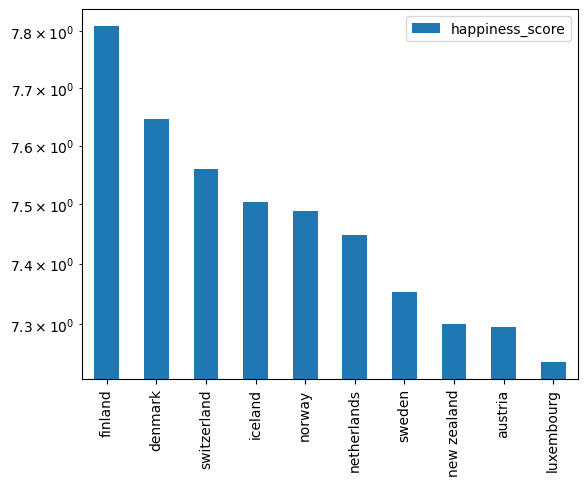

In [75]:
df.sort_values("happiness_score", ascending=False).head(10).plot.bar(y="happiness_score", logy=True)

We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [76]:
df.columns

Index(['area', 'population', 'literacy', 'happiness_score', 'social_support',
       'healthy_life_expectancy', 'freedom_of_choices', 'generosity',
       'perception_of_corruption', 'world_region'],
      dtype='object')

In [87]:
df.groupby("world_region").agg(
    mean_happiness_score_by_world_region=("happiness_score", "mean"), 
    n_countries_in_world_region=("world_region", "size")
).sort_values("mean_happiness_score_by_world_region", ascending=False)

,mean_happiness_score_by_world_region,n_countries_in_world_region
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [92]:
df.query("world_region=='North America and ANZ'")[["happiness_score"]]

,happiness_score
australia,7.2228
canada,7.2321
new zealand,7.2996
united states,6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [113]:
for row in df.query("literacy == 100").iterrows():
    print(f"{row[1].world_region} - {row[0]}({row[1].literacy})")

North America and ANZ - australia(100.0)
Western Europe - denmark(100.0)
Western Europe - finland(100.0)
Western Europe - luxembourg(100.0)
Western Europe - norway(100.0)


What is the global average?

In [114]:
df.literacy.mean()

81.85112781954888

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [122]:
print(f"{(df.literacy < 50).sum() / len(df):.2f}")

0.12


Print the raw number and the percentage of world population that is illiterate.

In [128]:
print(df[["population"]][df.literacy < 50].sum() / df.population.sum())
print(df[["population"]][df.literacy < 50].sum())

population    0.094472
dtype: float64
population    580572946
dtype: int64


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [130]:
df["population_density"] = df["population"] / df["area"]
df["population_density"]

afghanistan     47.964474
albania        124.587971
algeria         13.826065
argentina       14.428413
armenia         99.878255
                  ...    
venezuela       28.211650
vietnam        256.108041
yemen           40.639029
zambia          15.282748
zimbabwe        31.329830
Name: population_density, Length: 135, dtype: float64

What is the happiness score of the 3 countries with the lowest population density?

In [135]:
df[["happiness_score", "population_density"]].nsmallest(3, "population_density")

,happiness_score,population_density
mongolia,5.4562,1.810751
australia,7.2228,2.636201
botswana,3.4789,2.731371


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

<Axes: xlabel='happiness_score', ylabel='healthy_life_expectancy'>

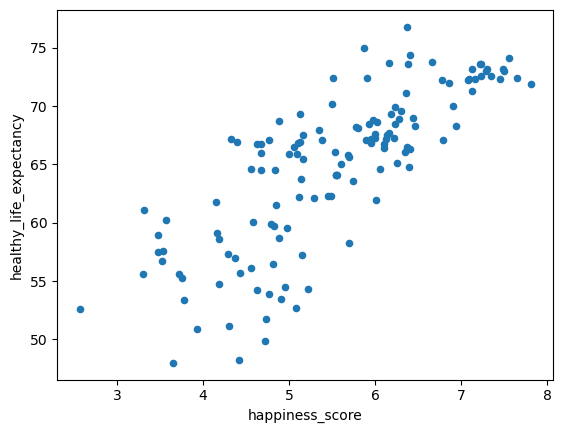

In [138]:
df.plot.scatter(x="happiness_score", y="healthy_life_expectancy")

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.